# **Overview**

We will use fictional data for this project, which is stored in three different files:

- **Customers information**
- **Contract information**
- **Services each customer was signed up for**

## **Dictionary of Variables**
Below is a description of the main variables used in the datasets:
###  **Customers information:**
* **gender:** Whether the customer is a male or a female;
* **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0);
* **Partner:** Whether the customer has a partner or not (Yes, No);
* **Dependents:** Whether the customer has dependents or not (Yes, No);

### **Contract information:**
* **tenure:** Numbers of months the costomer has stayed with the company;
* **Contract:** The contract term of the customer (Month-to-month, One year, Two year);
* **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic));
* **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No);
* **MonthlyCharges:** The amount charged to the customer monthly;
* **TotalCharges:** The total amount charged to the customer;

### **Services information:**

* **PhoneService:** Whether the customer has a phone service or not (Yes, No);
* **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service);
* **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No);
* **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service);
* **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service);
* **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service);
* **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service);
* **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service);
* **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service);


# **Imports**

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataframes
df_customers = pd.read_csv('/content/drive/MyDrive/Projeto Analise de Dados - Churn/files/churn_customers.csv')
df_contracts = pd.read_csv('/content/drive/MyDrive/Projeto Analise de Dados - Churn/files/churn_contracts.csv')
df_services = pd.read_csv('/content/drive/MyDrive/Projeto Analise de Dados - Churn/files/churn_services.csv')


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [5]:
df_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [7]:
df_contracts.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [9]:
df_services.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


# Data Transformation

We have already verified that there are no missing values in our DataFrames. However, we can observe that the TotalCharges variable has a data type of object, even though it should be a continuous numerical variable.

In [10]:
df_contracts["TotalCharges"].value_counts().head()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8


In [11]:
df_contracts["TotalCharges"].nunique()

6531

In [12]:
blank_values = (df_contracts['TotalCharges'].str.strip() == '').sum()
total_values = df_contracts.shape[0]
blank_percentage = (blank_values / total_values) * 100
print(f"Blank values: {blank_values}")
print(f"Percentage of blank values: {blank_percentage:.2f}%")

Blank values: 11
Percentage of blank values: 0.16%


* We found blank values in the TotalCharges column. However, the number of affected rows is very small — only 11 rows out of a total of 6,531 — which is less than 1% of the dataset.

In [13]:
# Filtering out rows where TotalCharges is a blank string
df_contracts = df_contracts[df_contracts['TotalCharges'].str.strip() != '']

In [14]:
# Transforming 'TotalCharges' to numeric type
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'])

In [15]:
df_contracts.dtypes

,0
customerID,object
tenure,int64
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64
TotalCharges,float64
Churn,object


# **DataFrame Merge**

We need all the data to come together in order to perform a better analysis as a whole. All three datasets share a common column, customerID, which we will use in the merge.

In [16]:
df_churn = df_customers.merge(df_services, on="customerID").merge(df_contracts, on="customerID")

In [17]:
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  tenure            7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# **Outliers Processing**

In [19]:
# Description of numeric variables
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


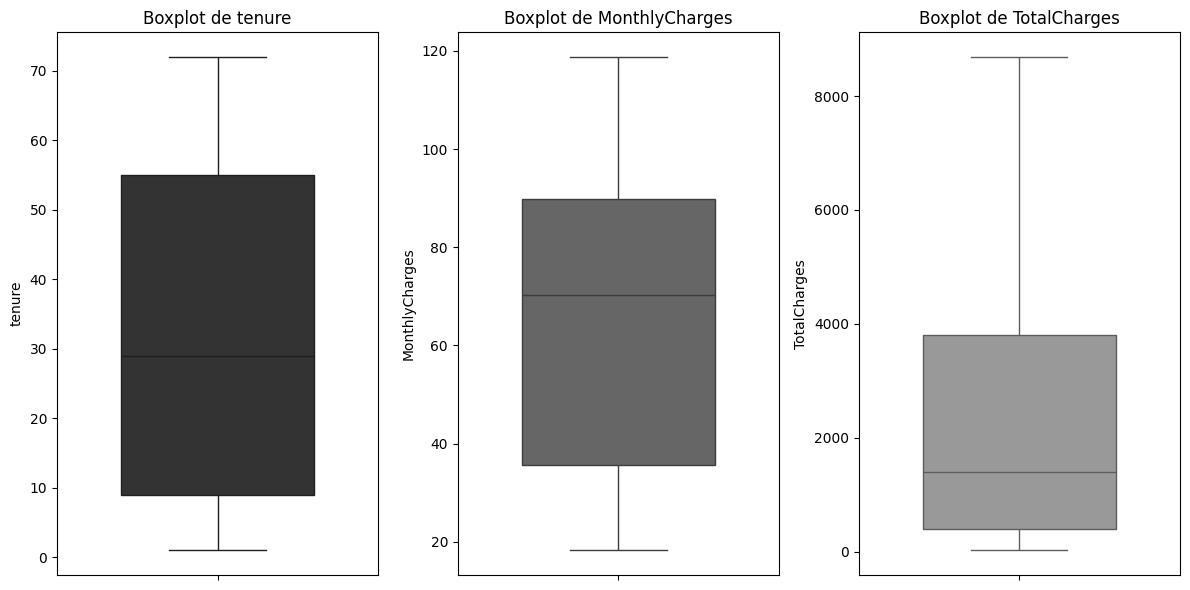

In [40]:
# Boxplots for detecting outliers in numerical variables
custom_palette = ['#333333', '#666666', '#999999']

plt.figure(figsize=(12, 6))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_churn[col], color=custom_palette[i - 1], width=0.6)  # Aumente para até 1.0 se quiser mais
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

* The lack of outliers across these variables is likely due to **predefined limits** inherent to the services offered and contract durations. This bounded nature results in distributions without extreme or anomalous values.


# **Visualization and Data Analysis (EDA)**

The following section includes steps for visualizing and analyzing the dataset using different types of plots. Each visualization aims to provide insights into customer data (including churn). That will help us identify relevant patterns and trends.


#### Distribution of Categorical Variables

In [21]:
# Calculating the count of each category in the 'Churn' column
churn_counts = df_churn['Churn'].value_counts()

# Using normalize=True to get the proportion instead of the count
churn_percentage = df_churn['Churn'].value_counts(normalize=True) * 100

print("**Analysis of the 'Churn' Variable**")
print("\nAbsolute Count:")
print(churn_counts)

print("\nPercentage (%):")
for label, percent in churn_percentage.items():
    print(f"{label}: {percent:.2f}%")


**Analysis of the 'Churn' Variable**

Absolute Count:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Percentage (%):
No: 73.42%
Yes: 26.58%


The company has a churn rate of approximately 26%, which is considered high for the telecommunications industry.

In general, acceptable churn rates in this sector range from 1% to 3% per month, totaling around 12% to 20% annually. A 26% churn rate suggests that more than 1 in 4 customers are leaving the company.

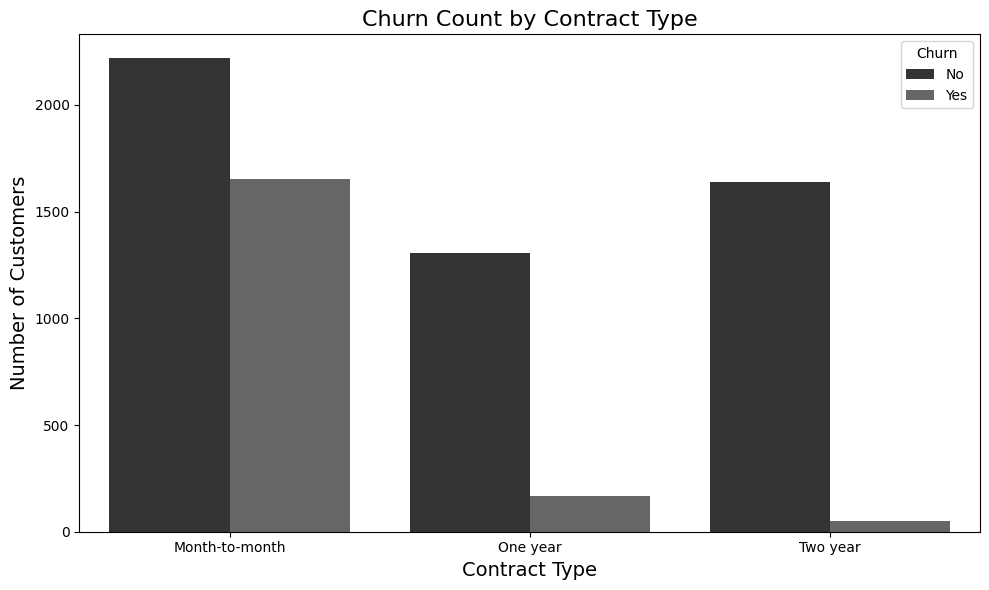

In [22]:
# Relation between Churn and Contract Type
plt.figure(figsize=(10,6), dpi=100)

custom_palette = ['#333333', '#666666'] # Custom color palette for the 'Churn' hue

sns.countplot(data=df_churn, x='Contract', hue='Churn', palette=custom_palette)

plt.title('Churn Count by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##### **INSIGHTS**
Looking at this histogram, here are some key insights we can extract:

* **Churn is highest among month-to-month contracts:**
The number of customers who churn (leave the company) is significantly higher in the "Month-to-month" contract category compared to the "One year" and "Two year" contracts.

* **Longer contracts are associated with lower churn:**
Customers with "One year" and especially "Two year" contracts show much lower churn rates. This suggests that longer-term contracts might be effective in retaining customers.

* **Majority of customers have month-to-month contracts:**
Both the churned and non-churned groups have the largest number of customers in the month-to-month category, indicating this is the most common contract type.

* **Churn risk decreases with contract length:**
The proportion of churners is highest in the month-to-month group and very low in two-year contracts, indicating that contract length might be a key factor influencing churn.

In [23]:
# Calculating Churn Rate by Contract
total_by_contract = df_churn['Contract'].value_counts()
churn_yes_by_contract = df_churn[df_churn['Churn'] == 'Yes']['Contract'].value_counts()
churn_rate_by_contract = (churn_yes_by_contract / total_by_contract) * 100
print(churn_rate_by_contract)

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: count, dtype: float64


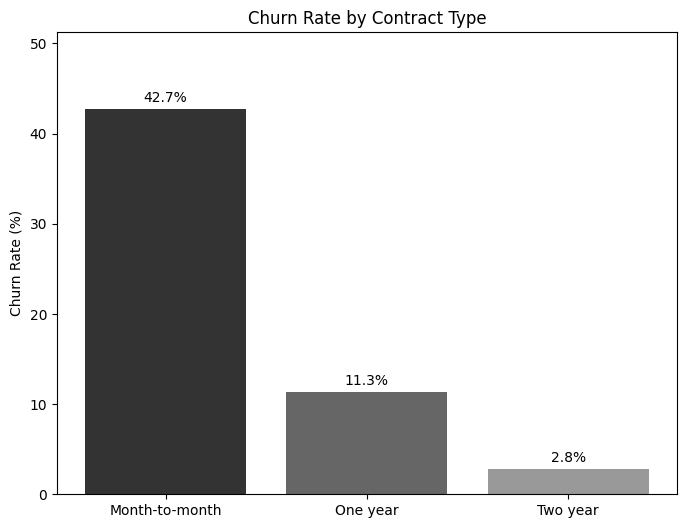

In [24]:
# Calculated churn rates
contracts = ['Month-to-month', 'One year', 'Two year']
churn_rates = [42.7, 11.3, 2.8]

custom_palette = ['#333333', '#666666', '#999999']


plt.figure(figsize=(8,6))
bars = plt.bar(contracts, churn_rates, color=custom_palette)


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', va='bottom')


plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, max(churn_rates) * 1.2)
plt.show()


**INSIGHT:** The longer the contract, the lower the Churn rate. Customers with monthly contracts are more likely to Churn.

In [25]:
df_churn['gender'].value_counts()

,count
gender,
Male,3549
Female,3483


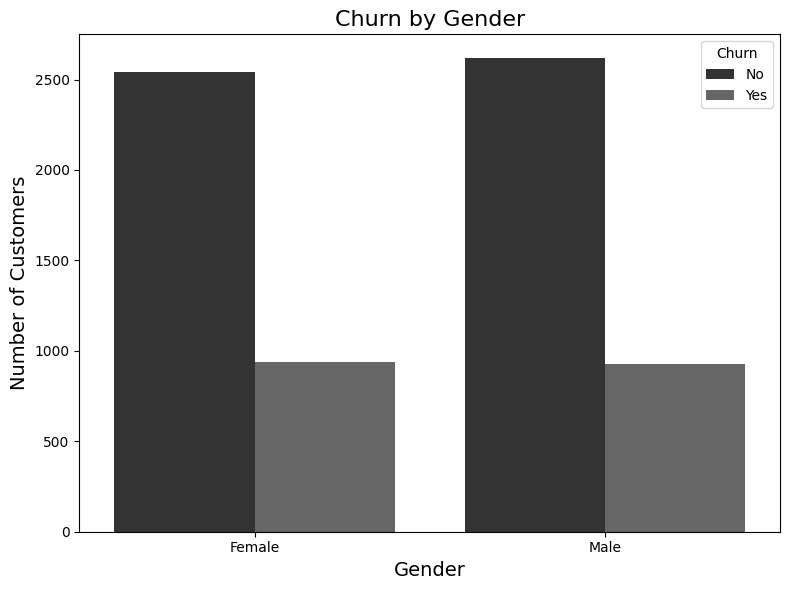

In [26]:
# Relation between Gender and Churn

plt.figure(figsize=(8,6), dpi=100)

custom_palette = ['#333333', '#666666']

sns.countplot(data=df_churn, x='gender', hue='Churn', palette=custom_palette)

plt.title('Churn by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##### **Observation:**

Customer distribution by gender is balanced. The number of female and male customers is quite similar, indicating a well-balanced customer base in terms of gender. The height of the darker bars (representing churned customers) is almost equal for both male and female.

This suggests that gender is not a significant factor influencing customer churn in this dataset.



In [27]:
# Describing all object dtype variables
df_churn.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


* Since most service variables are binary (Yes/No), we can easily identify which services have a stronger relationship with churn by creating plots to compare churn rates between customers who subscribe or don’t subscribe to each service. This will help prioritize actions on services most linked to customer cancellations.

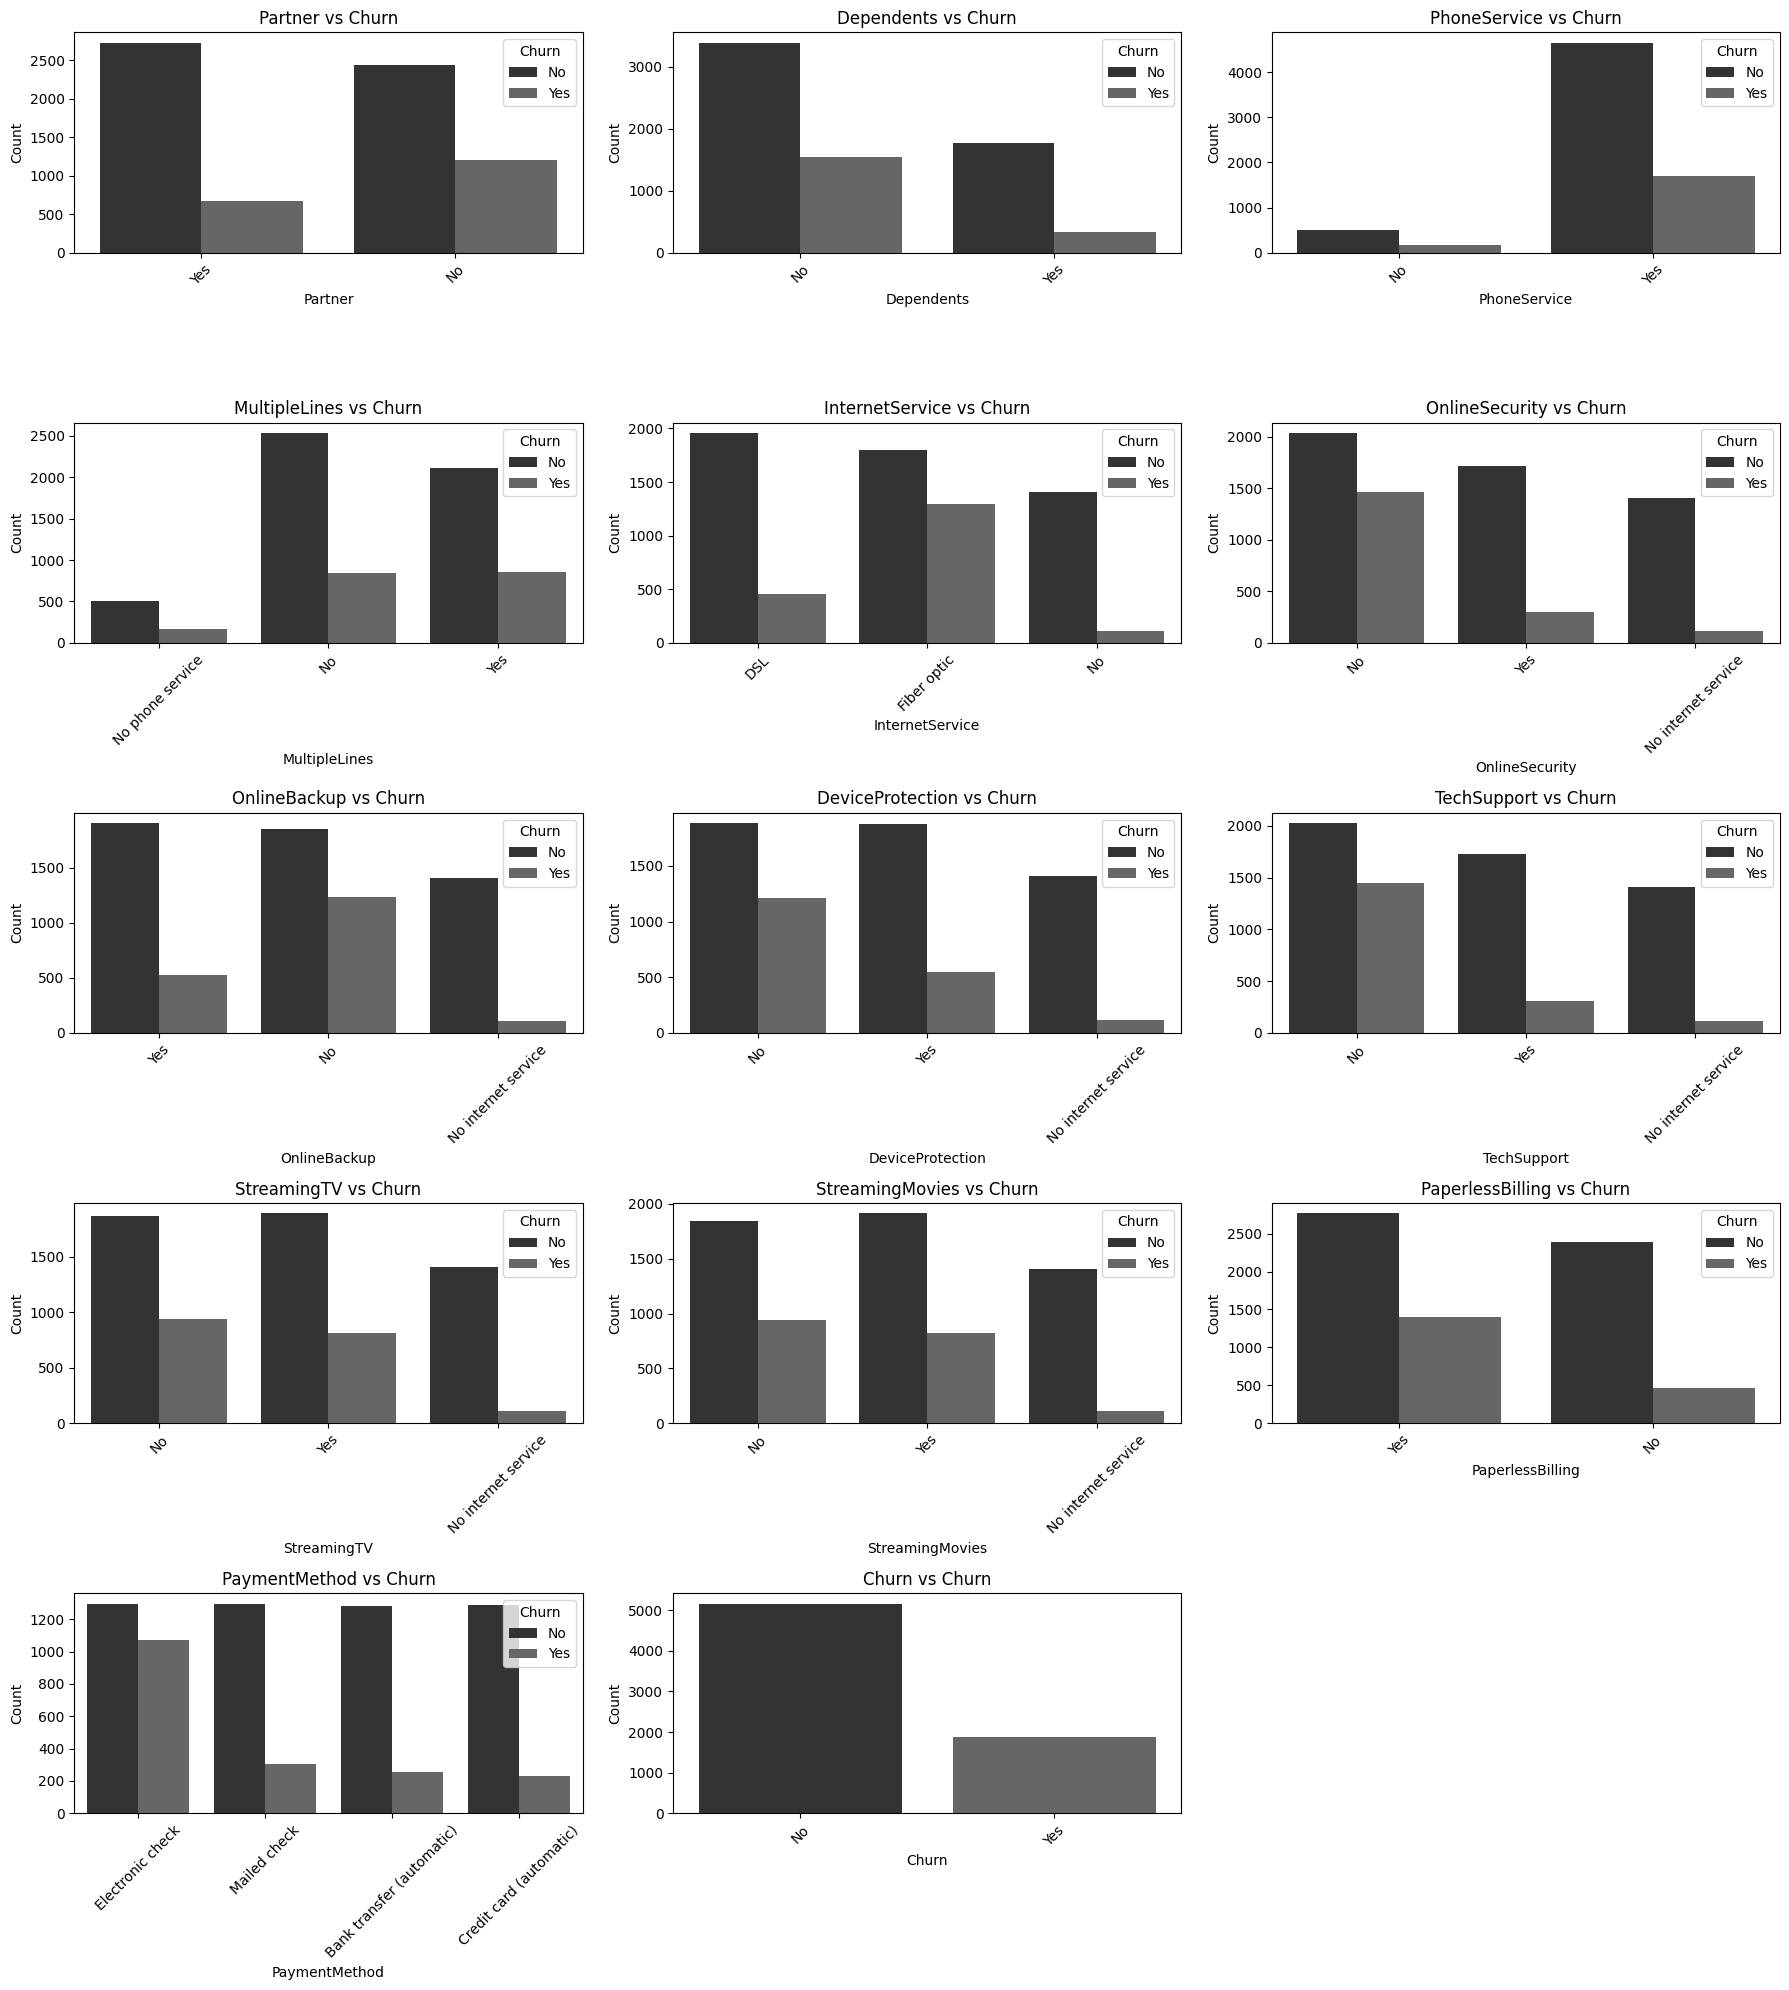

In [28]:
# Ploting all the categorical columns except 'customerID', 'gender, 'Contract'
import math

categorical_columns = df_churn.select_dtypes(include=['object']).drop(['customerID', 'gender', 'Contract'], axis=1).columns


n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), dpi=100)
axes = axes.flatten()

custom_palette = ['#333333', '#666666']


for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Churn', data=df_churn, palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'{column} vs Churn', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **INSIGHTS**

*Based on Telecom Service Offerings variables we can extract this informations:*

`Partner:`
Customers with a partner show a lower churn rate compared to those without one, suggesting that relationship stability contributes to customer retention.

`Dependents:`
Customers without dependents churn more often than those with dependents, indicating that family responsibilities may encourage customers to keep their service longer.

`Phone Service:`
Customers without phone service have a relatively lower churn rate, possibly because those with phone lines are more likely to be dissatisfied or find alternative solutions.

`Multiple Lines:`
Customers with multiple lines exhibit higher churn rates, which could be related to increased complexity of the plan or billing issues.

`Internet Service:`
Customers with fiber optic internet experience significantly higher churn compared to those with DSL or no internet service, suggesting dissatisfaction with fiber optic offerings or pricing.

`Online Security:`
Customers who do not subscribe to online security services churn at much higher rates, indicating that these add-on services are effective in increasing customer loyalty.

`Online Backup:`
Similarly, customers without online backup services are more likely to churn, highlighting another retention opportunity through value-added services.

`Device Protection:`
A lack of device protection correlates with higher churn, suggesting that device-related services contribute positively to retention.

`Tech Support:`               Customers without technical support have significantly higher churn, demonstrating the importance of support services in maintaining long-term customer relationships.

`Streaming TV & Movies:`
Customers who do not subscribe to streaming TV or movies are more likely to churn, implying that bundled entertainment options can enhance customer stickiness.

`Paperless Billing:`
Customers using paperless billing have higher churn rates, which could mean they are more tech-savvy and comfortable switching providers, or that they find it easier to cancel.

`Payment Method:`
Customers paying by mailed check show higher churn compared to those using electronic payment methods (e.g., bank transfer or credit card), which may reflect payment convenience as a retention factor.

#### Distribution of Numerical Variables

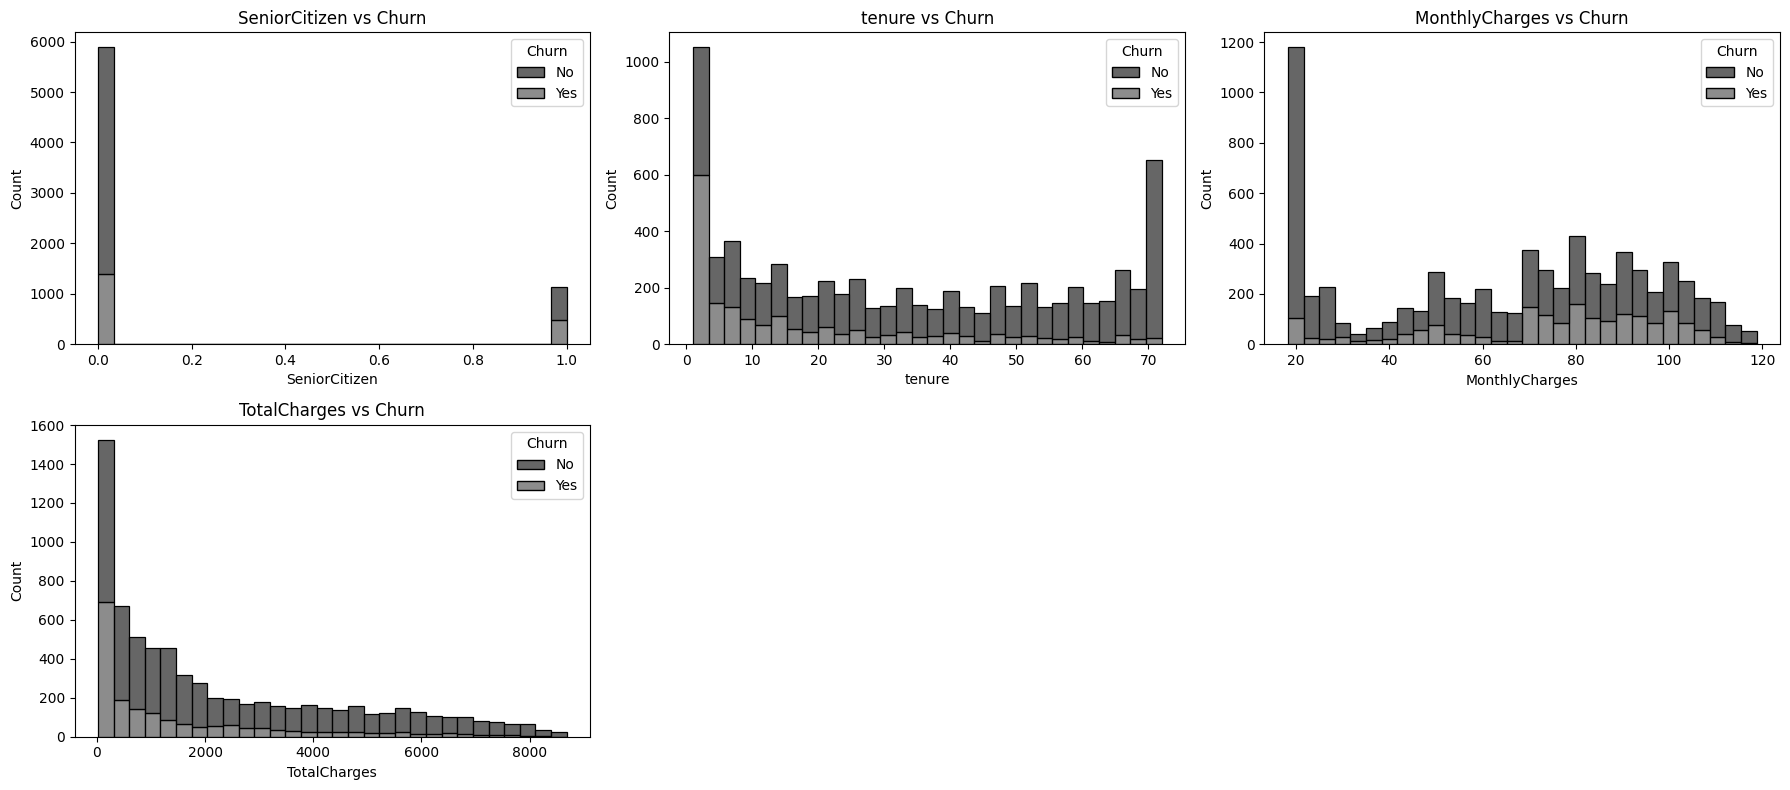

In [29]:
numerical_columns = df_churn.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), dpi=100)
axes = axes.flatten()

custom_palette = ['#333333', '#666666']  # cores para churn

for i, column in enumerate(numerical_columns):
    sns.histplot(
        data=df_churn,
        x=column,
        hue='Churn',
        multiple='stack',
        palette=custom_palette,
        ax=axes[i],
        bins=30,
        edgecolor='black'
    )
    axes[i].set_title(f'{column} vs Churn', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

# Remove eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **INSIGHTS**
`SeniorCitizen:` The vast majority of customers are not seniors (SeniorCitizen = 0), but among the few senior customers (SeniorCitizen = 1), the proportion of churn is noticeably higher.

`Tenure:` The highest concentration of churn in the data, according to Tenure, is observed at the extremes of the graph, specifically at the peaks between 1-3 months and 70-72 months. This indicates that customers with shorter contracts tend to cancel more frequently, while those who stay longer have a lower chance of churn. It suggests that most customers who canceled the service did so early, likely within the first few months of their contract.

`MonthlyCharges:` Churn increases as monthly charges rise.The range of $70 to $100+ shows a significant concentration of churned customers.This suggests that more expensive packages are directly linked to customer dissatisfaction.

`TotalCharges:` Customers with low accumulated charges (<1000) have a higher churn incidence, reinforcing that many cancel early in their relationship with the company. For customers with high accumulated charges (>3000), the churn rate drops constinously. These are probably the loyal customers who have stayed long enough to build significant total charges.

# Data Correlation

In [30]:
# Fixing 'SeniorCitizen' variable, because it's in the numeric type
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [31]:
# Transoforming 'SeniorCitizen' to object type
df_churn['SeniorCitizen'] = df_contracts['TotalCharges'].astype('object')

In [32]:
# Correlation between Numerical Variables
corr_numeric = df_churn.select_dtypes(include=['int64', 'float64'])
numeric_matrix = corr_numeric.corr()
numeric_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<Axes: >

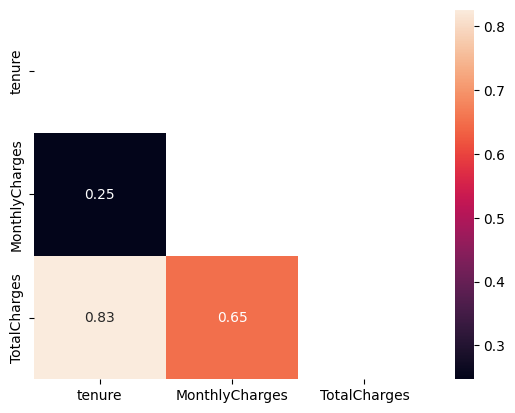

In [33]:
mask = np.zeros_like(numeric_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(numeric_matrix, annot=True, mask=mask)

**INSIGHT:** We observe a strong correlation between the customer's tenure and the total charges. Also between 'TotalCharges' and 'MonthlyCharges'. There is also a positive correlation between 'TotalCharges' and 'MonthlyCharges', although it is not as linear as the correlation with Tenure.

In [34]:
# To see the correlation between the categorical variables we will need dython library
!pip install dython

/usr/local/lib/python3.11/dist-packages/dython/nominal.py:558: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(nan_replace_value, inplace=True)


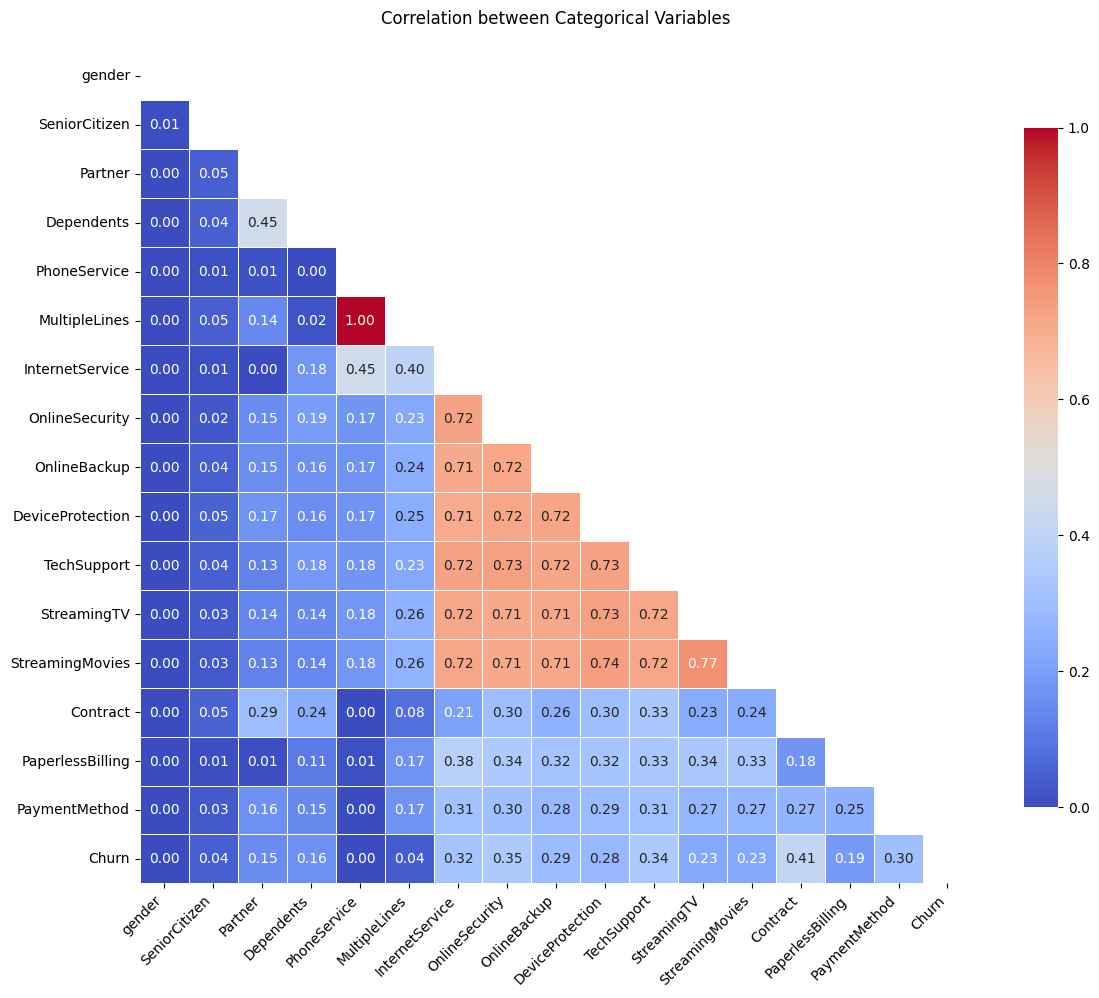

In [35]:
# Ploting HeatMap of Categorical Variables
from dython.nominal import associations


corr_categorical = df_churn.select_dtypes(include=['object']).drop('customerID', axis=1).columns


assoc = associations(df_churn[corr_categorical],
                    plot=False,
                    compute_only=True)


corr_matrix = assoc['corr']
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=0,
            vmax=1,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})


plt.title("Correlation between Categorical Variables", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Key Insights from Categorical Variable Correlation Analysis**

#### 1. **Gender Shows Minimal Influence**  
- As we have already seen, variables show very low correlation (0.00–0.05) with `Gender`.

---

#### 2. **Strong Interdependence Among Internet Services**  
- High correlations (**0.71–0.77**) between:  
  - `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`.

**Implication:** Customers who subscribe to one of these services are strongly likely to use several others: indicating a **preference for bundled packages**.

---

#### 3. **Family Structure: Dependents and Partner**  
- Moderate correlation (**0.45**) between having a `Partner` and `Dependents`, which aligns with typical family dynamics.

---

#### 4. **Churn**  
- Highest correlations with `Churn`:  
  - `Contract` (**0.41**): Shorter contracts are associated with a **higher risk of cancellation**.  
  - `OnlineSecurity` (**0.35**) and `TechSupport` (**0.34**): **Lack of these services** relates to higher churn.  
  - `PaperlessBilling` (**0.19**): Weaker but still notable correlation.

---

#### 5. **MultipleLines and InternetService**  
- Correlation of **0.45**: Customers with multiple phone lines are **more likely to subscribe to InternetService**.

---

#### 6. **Contract Ties to Stability**  
- Moderate correlations with:  
  - `Partner` (**0.29**) and `Dependents` (**0.24**)

**INSIGHT:** Long-term contracts may reflect **greater family stability or commitment**.



# **Conclusion**

This exploratory investigation revealed several key causes related to customer churn in the analyzed dataset. The findings indicate that the company has the opportunity to significantly reduce the number of customers who cancel by applying methods designed to address the critical points identified.

Another suggestion would be to create a system that predicts customer churn based on this information. This would make it possible to more clearly identify customers with a higher likelihood of canceling, enabling more targeted and effective preventive measures.

Reducing churn is vital for the business, as acquiring new customers is usually more costly than retaining existing ones. The suggested actions, considering the insights from this investigation, can greatly improve customer loyalty and, consequently, the company’s profitability.

Furthermore, it is recommended to continuously monitor churn-related data and periodically review customer behavior to ensure that the strategies remain effective over time.